In [1]:
import pandas as pd
import geopandas as gpd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime , date, time
from fuzzywuzzy import fuzz
import regex as re

C:\Users\mega\AppData\Local\Continuum\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [11]:
df_pluto = gpd.read_file('D:/GIS/Pluto/18.2.1/nyc_mappluto_18v2_1_fgdb/MapPLUTO_18v2_1.gdb/')
df_pluto.columns = df_pluto.columns.str.upper()
df_pluto.columns = df_pluto.columns.str.replace('GEOMETRY','geometry')
print(len(df_pluto))
print(df_pluto.columns)
df_pluto = df_pluto[['ADDRESS','ZIPCODE','BBL','OWNERTYPE','OWNERNAME','BLDGCLASS','LANDUSE','RESIDFAR','COMMFAR','LOTAREA','SHAPE_AREA','XCOORD','YCOORD','geometry']]
df_pluto.ADDRESS = list(map(lambda x: str(x),df_pluto.ADDRESS))

857374
Index(['BOROUGH', 'BLOCK', 'LOT', 'CD', 'CT2010', 'CB2010', 'SCHOOLDIST',
       'COUNCIL', 'ZIPCODE', 'FIRECOMP', 'POLICEPRCT', 'HEALTHCENTERDISTRICT',
       'HEALTHAREA', 'SANITBORO', 'SANITDISTRICT', 'SANITSUB', 'ADDRESS',
       'ZONEDIST1', 'ZONEDIST2', 'ZONEDIST3', 'ZONEDIST4', 'OVERLAY1',
       'OVERLAY2', 'SPDIST1', 'SPDIST2', 'SPDIST3', 'LTDHEIGHT', 'SPLITZONE',
       'BLDGCLASS', 'LANDUSE', 'EASEMENTS', 'OWNERTYPE', 'OWNERNAME',
       'LOTAREA', 'BLDGAREA', 'COMAREA', 'RESAREA', 'OFFICEAREA', 'RETAILAREA',
       'GARAGEAREA', 'STRGEAREA', 'FACTRYAREA', 'OTHERAREA', 'AREASOURCE',
       'NUMBLDGS', 'NUMFLOORS', 'UNITSRES', 'UNITSTOTAL', 'LOTFRONT',
       'LOTDEPTH', 'BLDGFRONT', 'BLDGDEPTH', 'EXT', 'PROXCODE', 'IRRLOTCODE',
       'LOTTYPE', 'BSMTCODE', 'ASSESSLAND', 'ASSESSTOT', 'EXEMPTLAND',
       'EXEMPTTOT', 'YEARBUILT', 'YEARALTER1', 'YEARALTER2', 'HISTDIST',
       'LANDMARK', 'BUILTFAR', 'RESIDFAR', 'COMMFAR', 'FACILFAR', 'BOROCODE',
       'BBL', 'CONDONO

# Yimby
Last Web scrape 2019-08-16 

In [324]:
yimby = pd.read_csv('data/yimby.csv')
 
yimby = yimby.fillna("NONE")
yimby.tags = yimby.tags.str.upper()
yimby.content = yimby.content.str.upper()
yimby.title = yimby.title.str.upper() 
yimby.tags = list(map(lambda x: x.split(','),yimby.tags))
yimby['ID'] = yimby.index
yimby['source'] = "YIMBY"
yimby.content = yimby.content.str.replace('\xa0', ' ')
yimby.title = yimby.title.str.replace('\xa0', ' ')
yimby.content = yimby.content.str.replace('\n', ' ')
yimby.title = yimby.title.str.replace('\n', ' ')
yimby.to_csv("D:/NYC_Data/web_news/20190816yimby.csv", index = False)

,content,date_published,tags,title,new_id,source
0,Permits have been filed for a 19-story mixed-u...,"June 28, 2019 6:30 am","82 East 127th Street,Artimus Construction,East...",Permits Filed for 82 East 127th Street in East...,0,YIMBY
1,Permits have been filed for an eight-story res...,"July 4, 2019 7:00 am","1745 West Farms Road,Badaly Architect,Badaly A...",Permits Filed for 1745 West Farms Road in Fair...,1,YIMBY
2,The curtain wall assembly is progressing swift...,"June 30, 2019 7:30 am","615 Tenth Avenue,Architecture,Construction Upd...",Hudson Garden’s Façade Installation Makes Head...,2,YIMBY
3,Hoboken-based architect Marchetto Higgins Stie...,"July 6, 2019 8:00 am","184 Morgan Street,Architecture,Construction Up...",Renderings Revealed for New Residential Skyscr...,3,YIMBY
4,Permits have been filed for a 14-story mixed-u...,"July 2, 2019 6:30 am","268 Barbey Street,Brooklyn,Dattner Architects,...",Permits Filed for 268 Barbey Street in East Ne...,4,YIMBY
...,...,...,...,...,...,...
6867,Construction has been stalled at Greenpoint’s ...,"July 17, 2014 7:00 am","55 Eckford Street,Architecture,Aufgang Archite...",Completion Finally Imminent: 55 Eckford Street,6867,YIMBY
6868,Applications have been filed to construct a si...,"July 17, 2014 11:00 am","10 West 132nd Street,1095 Rockland Avenue,121-...","DOB Digest: Harlem Infill, Staten Island Subdi...",6868,YIMBY
6869,When the Jamaica Plan rezoning was passed by C...,"July 17, 2014 6:30 am","148-37 88th Avenue,148-46 Hillside Avenue,Geor...",Permits Filed: 148-46 Hillside Avenue & 148-37...,6869,YIMBY
6870,"Recently revealed by YIMBY, excavation work re...","July 17, 2014 1:00 pm","194 Orchard Street,25-05 43rd Avenue,291 Lenox...",YIMBY Today: Excavation Begins at 43-25 Hunter...,6870,YIMBY


In [91]:
# i = '250 WEST 55'
# df_pluto['NEWID'] = ''

# Check content list
title_list = list(yimby[list(map(lambda x: i in x,yimby.title))].index)
# Check content list
content_list = list(yimby[list(map(lambda x: i in x,yimby.content))].index)
# Check tag list
tag_list = list(yimby[list(map(lambda x: i in x,yimby.tags))].index)

print(title_list)
print(content_list)
print(tag_list)

a = title_list + content_list + tag_list
list(dict.fromkeys(a))

[3425, 4196, 4334, 4503]
[3425, 4196, 4503, 5342, 6211]
[83, 3425, 4196, 4334, 4503, 4775, 5067, 5342, 5420]


[3425, 4196, 4334, 4503, 5342, 6211, 83, 4775, 5067, 5420]

In [94]:
yimby[yimby.index.isin(a)]

,content,date_published,tags,title,ID
83,NEW YORK-BASED DEVELOPER HAS SURPASSED ANOTHE...,2019-06-18,"[138 WILLOUGHBY STREET, ARCHITECTURE, BROOKLYN...",HIGHEST RESIDENTIAL INFINITY POOL IN WESTERN H...,83
3425,"LAST SUMMER, THE TIMES THAT EXTELL HAD ACQUIR...",2016-04-14,"[138 WILLOUGHBY STREET, ARCHITECTURE, BROOKLYN...","REVEALED: 138 WILLOUGHBY STREET, EXTELL’S 59-S...",3425
4196,"AMONG NEW YORK CITY’S DEVELOPERS, EXTELL HAS P...",2017-08-09,"[138 WILLOUGHBY STREET, ARCHITECTURE, BROOKLYN...",EXCAVATION COMPLETE FOR CITYPOINT’S THIRD AND ...,4196
4334,THE ONGOING DOWNTOWN BROOKLYN DEVELOPMENT BOOM...,2017-10-13,"[138 WILLOUGHBY STREET, ARCHITECTURE, BROOKLYN...",EXTELL’S 68-STORY “BROOKLYN POINT” AT 138 WILL...,4334
4503,"TWO MONTHS AGO, , WHICH IS EXTELL’S FIRST SKYS...",2017-12-18,"[138 WILLOUGHBY STREET, ARCHITECTURE, BROOKLYN...",EXCLUSIVE NEW RENDERINGS FOR EXTELL’S BROOKLYN...,4503
4775,RENDERINGS HAVE BEEN REVEALED FOR THE ROOFTOP ...,2018-02-06,"[138 WILLOUGHBY STREET, ARCHITECTURE, BROOKLYN...",WESTERN HEMISPHERE’S HIGHEST ROOFTOP INFINITY ...,4775
5067,"CONSTRUCTION AT EXTELL’S 138 WILLOUGHBY, AKA B...",2018-06-07,"[138 WILLOUGHBY STREET, ARCHITECTURE, BROOKLYN...","SALES GALLERY IMAGES REVEALED, CONSTRUCTION UP...",5067
5342,HAS ANNOUNCED THE SUCCESSFUL ACQUISITION OF $...,2018-08-06,"[138 WILLOUGHBY STREET, BROOKLYN, BROOKLYN POI...",EXTELL SECURES $530 MILLION IN FINANCING FOR B...,5342
5420,THE SOON-TO-BE TALLEST SKYSCRAPER IN BROOKLYN ...,2018-09-05,"[138 WILLOUGHBY STREET, ARCHITECTURE, BROOKLYN...",BROOKLYN POINT’S FACADE BEGINS RISING AS SUPER...,5420
6211,"YIMBY RECENTLY WENT ON A HARD HAT TOUR OF , AK...",2019-04-25,"[ARCHITECTURE, BROOKLYN POINT, CITY POINT, CON...","YIMBY TOURS EXTELL’S BROOKLYN POINT, THE BOROU...",6211


# Brownstoner

Last Web scrape 2019-08-20

In [325]:
brown = pd.read_csv('data/brownstoner.csv')

brown = brown.dropna(subset = ['date_published']).reset_index(drop = True)
brown = brown.fillna("NONE")

brown.date_published = list(map(lambda x: datetime.strptime(x, "%Y-%m-%d"),brown.date_published))

brown.title = brown.title.str.replace('\xa0', ' ')
brown.content = brown.content.str.replace('\xa0', ' ')
brown.tags = brown.tags.str.replace('\xa0', ' ')

brown.title = brown.title.str.replace('\n', ' ')
brown.content = brown.content.str.replace('\n', ' ')
brown.tags = brown.tags.str.replace('\n', ' ')

brown.title = brown.title.str.upper()
brown.content = brown.content.str.upper()
brown.tags = brown.tags.str.upper()

brown.tags = list(map(lambda x: x.split(','),brown.tags))
brown['ID'] = brown.index
brown['source'] = "BROWNSTONER"

brown.to_csv("D:/NYC_Data/web_news/20190820_brownstoner.csv", index = False)
brown.sample(5)

,content,date_published,tags,title,ID,source
45629,BROWNSTONER LLCIF YOU’RE LOOKING FOR A HOME WI...,2018-12-14,"[127 4TH PLACE, BROOKLYN BRIDGE REALTY]",SPACIOUS DUPLEX CONDO IN CARROLL GARDENS WITH ...,45629,BROWNSTONER
37420,THIS RAMBLING VICTORIAN AT 92 ARGYLE ROAD IN P...,2014-09-03,"[DITMAS PARK, HOTD, HOUSE OF THE DAY, PROSPECT...",HOUSE OF THE DAY: 92 ARGYLE ROAD,37420,BROWNSTONER
28544,HERE IS A ROUNDUP OF PROPERTIES WE’VE FEATURED...,2012-12-07,"[CO-OPS, HOUSES, MULTI-FAMILY]",QNYC REAL ESTATE LISTINGS OF THE DAY – CO-OPS ...,28544,BROWNSTONER
45035,"SOON AFTER BUYING A THREE-STORY, WOODWORK-LADE...",2018-06-21,"[FEATURED, LINDA CAVA, THE INSIDER]","THE INSIDER: ORIGINAL WOODWORK, SPLASHES OF CO...",45035,BROWNSTONER
39167,HERE’S A ONE-BEDROOM CO-OP FOR RENT IN KENSING...,2015-03-04,"[KENSINGTON, RENTAL OF THE DAY, RENTALS, THE M...",RENTAL OF THE DAY: 310 BEVERLEY ROAD,39167,BROWNSTONER


# TRD
Last Web scrape 2019-05-19

In [326]:
real_dev = pd.read_csv('data/realdeal_dev_full.csv')
real_resid = pd.read_csv('data/realdeal_resid_full.csv')

real = pd.concat([real_dev,real_resid])

real = real.dropna(subset = ['date_published']).reset_index(drop = True)
real = real.fillna("NONE")

real.date_published = list(map(lambda x: str(x).strip(), real.date_published))
real.date_published  = list(map(lambda x: datetime.strptime(x, "%B %d, %Y %I:%M%p"),real.date_published))

real.title = real.title.str.replace('\xa0', ' ')
real.content = real.content.str.replace('\xa0', ' ')
real.tags = real.tags.str.replace('\xa0', ' ')

real.title = real.title.str.replace('\n', ' ')
real.content = real.content.str.replace('\n', ' ')
real.tags = real.tags.str.replace('\n', ' ')

real.title = real.title.str.upper()
real.content = real.content.str.upper()
real.tags = real.tags.str.upper()

real.tags = list(map(lambda x: x.split(','),real.tags))

real = real[['content','date_published','tags','title']]
real['ID'] = real.index
real['source'] = "TRD"

In [162]:
re = "/\s+(\d{2,5}\s+)(?![a|p]m\b)(([a-zA-Z|\s+]{1,5}){1,2})?([\s|\,|.]+)?(([a-zA-Z|\s+]{1,30}){1,4})(court|ct|street|st|drive|dr|lane|ln|road|rd|blvd)([\s|\,|.|\;]+)?(([a-zA-Z|\s+]{1,30}){1,2})([\s|\,|.]+)?\b(AK|AL|AR|AZ|CA|CO|CT|DC|DE|FL|GA|GU|HI|IA|ID|IL|IN|KS|KY|LA|MA|MD|ME|MI|MN|MO|MS|MT|NC|ND|NE|NH|NJ|NM|NV|NY|OH|OK|OR|PA|RI|SC|SD|TN|TX|UT|VA|VI|VT|WA|WI|WV|WY)([\s|\,|.]+)?(\s+\d{5})?([\s|\,|.]+)/i"
re.findall('/\s+(\d{2,5}\s+)(?![a|p]m\b)(([a-zA-Z|\s+]{1,5}){1,2})?([\s|\,|.]+)?(([a-zA-Z|\s+]{1,30}){1,4})(court|ct|street|st|drive|dr|lane|ln|road|rd|blvd)([\s|\,|.|\;]+)?(([a-zA-Z|\s+]{1,30}){1,2})([\s|\,|.]+)?\b(AK|AL|AR|AZ|CA|CO|CT|DC|DE|FL|GA|GU|HI|IA|ID|IL|IN|KS|KY|LA|MA|MD|ME|MI|MN|MO|MS|MT|NC|ND|NE|NH|NJ|NM|NV|NY|OH|OK|OR|PA|RI|SC|SD|TN|TX|UT|VA|VI|VT|WA|WI|WV|WY)([\s|\,|.]+)?(\s+\d{5})?([\s|\,|.]+)/i', '250 WEST 55')

AttributeError: 'str' object has no attribute 'findall'

In [165]:
import re

txt = "111 WEST 55"
regexp = "[0-9]{1,3} .+, .+, [A-Z]{2} [0-9]{5}"
address = re.findall(regexp, txt)
address

[]

# New York Post
Last Web scrape 2019-08-23

In [608]:
post = pd.read_csv('data/post.csv')

post = post.dropna(subset = ['date_published']).reset_index(drop = True)
post = post.fillna("NONE")

# post.date_published = list(map(lambda x: str(x).strip(), post.date_published))
post.date_published  = list(map(lambda x: datetime.strptime(x, "%B %d, %Y %I:%M%p"),post.date_published))

post.title = post.title.str.replace('\xa0', ' ')
post.content = post.content.str.replace('\xa0', ' ')
post.tags = post.tags.str.replace('\xa0', ' ')

post.title = post.title.str.upper()
post.content = post.content.str.upper()
post.tags = post.tags.str.upper()

post.tags = list(map(lambda x: x.split(','),post.tags))

post = post[['content','date_published','tags','title']]
post['ID'] = post.index
post['source'] = "POST"

In [629]:
post.sample(10)

,content,date_published,tags,title,ID,source
3161,REAL ESTATE ALL I DID WAS DRAW. I WOULD DRAW E...,2015-03-25 18:44:00,"[DESIGN, FURNITURE, MUSEUMS, REAL ESTATE]",Q&A WITH BAD-BOY DESIGNER KARIM RASHID,3161,POST
1600,REAL ESTATEAS I WATCHED THE YELLOW EARTH MOVER...,2012-02-09 05:00:00,[RESIDENTIAL REAL ESTATE],ANOTHER ONE BITES THE DUST,1600,POST
3828,REAL ESTATEFACEBOOK CO-FOUNDER AND NEW REPUBLI...,2016-01-26 21:37:00,"[CELEBRITY REAL ESTATE, CHRIS HUGHES, FACEBOOK...",FACEBOOK CO-FOUNDER’S MANHATTAN TOWNHOUSE HAS ...,3828,POST
898,REAL ESTATE THE OWNERS OF THE BAR REN DRAKE HO...,2011-04-19 04:00:00,[COMMERCIAL REAL ESTATE],DRAKE SITE DEMOLITION OK’D,898,POST
5808,"BUSINESSUPDATED MORE THAN 1,000 BLOOMINGDALE’S...",2017-11-07 16:48:00,"[BLOOMINGDALES, LONG ISLAND CITY, OFFICE SPACE...",BLOOMINGDALE’S IS MOVING 1K WORKERS TO QUEENS,5808,POST
4022,REAL ESTATEWE HEAR THAT THE MYSTERY BUYER OF T...,2016-07-13 18:35:00,"[GIMME SHELTER, REAL ESTATE, UPPER EAST SIDE]",BILLIONAIRE REVEALED AS MYSTERY UES APARTMENT ...,4022,POST
1201,REAL ESTATEIF EVER THERE WAS A BEDROOM MEANT F...,2011-10-27 04:00:00,[RESIDENTIAL REAL ESTATE],WIDE AWAKE ABOVE MIDTOWN,1201,POST
4480,REAL ESTATEA COMPANY THAT CREATED AN APP THAT ...,2016-09-21 00:54:00,"[BETWEEN THE BRICKS, COMMERCIAL REAL ESTATE, M...",EMERGENCY TEXT APP SNAGS LARGER SPACE ON WEST ...,4480,POST
7057,REAL ESTATETHE SKYSCRAPERS MAY BE THE STARS OF...,2019-01-16 17:11:00,"[AWARDS, COMMERCIAL REAL ESTATE, GALAS, PARTIE...",INSIDE THE REAL ESTATE WORLD’S MOST EXCLUSIVE ...,7057,POST
5668,"LIVINGUPDATED HAVE NEW YEAR, WILL TRAVEL. HERE...",2018-01-01 12:23:00,"[ALASKA, ASIA, AUSTRALIA, CANADA, DETROIT, EGY...",THE BEST PLACES TO GO IN 2018,5668,POST


# Commercial Observer

Last Web scrape 2019-08-23

In [511]:
commob = pd.read_csv('data/commob.csv')

commob = commob.dropna(subset = ['date_published']).reset_index(drop = True)
commob = commob.fillna("NONE")

commob.date_published  = list(map(lambda x: datetime.strptime(x, "%B %d, %Y%I:%M %p"),commob.date_published))

commob.title = commob.title.str.replace('\xa0', ' ')
commob.content = commob.content.str.replace('\xa0', ' ')
commob.tags = commob.tags.str.replace('\xa0', ' ')

commob.title = commob.title.str.upper()
commob.content = commob.content.str.upper()
commob.tags = commob.tags.str.upper()

commob.tags = list(map(lambda x: x.split(','),commob.tags))

commob = commob[['content','date_published','tags','title']]
commob['ID'] = commob.index
commob['source'] = "COMMERCIAL OBSERVER"

In [512]:
commob.sample(10)

,content,date_published,tags,title,ID,source
2510,THE NON-PROFIT HAS SIGNED A LONG-TERM RENEWAL...,2013-04-30 14:09:00,"[257 PARK AVENUE SOUTH, ALAN DESINO, BRIAN FEI...","ENVIRONMENTAL DEFENSE FUND RENEWS 44,000 SF AT...",2510,COMMERCIAL OBSERVER
1418,NONE,2018-09-25 11:50:00,"[130 FIFTH AVENUE, AUTODESK, BROOKS SLOCUM, SG...",THE PLAN: ZILLOW GROUP’S NEW SGA-DESIGNED DIGS...,1418,COMMERCIAL OBSERVER
8414,"CHICAGO, AMERICA’S THIRD-LARGEST OFFICE MARKET...",2017-12-08 12:51:00,"[EDWARD DITTMER, MORNING GLORY, MORNINGSTAR CR...",CHICAGO OFFICE—SUBURBS’ LOSSES ARE DOWNTOWN’SG...,8414,COMMERCIAL OBSERVER
5262,NONE,2016-09-30 18:30:00,"[530 SEVENTH AVENUE, FRED & FARID, NEWMARK KNI...",TWO TENANTS SIGN SUBLEASES AT SAVITT’S 530 SEV...,5262,COMMERCIAL OBSERVER
6591,D.C.-BASED AND HAVE SIGNED ON AS ANCHOR RETA...,2018-12-05 15:42:00,"[CALL YOUR MOTHER, CHILDRENS NATIONAL HEALTH S...",JUICE BAR AND COFFEE ROASTER WILL ANCHOR DC’S ...,6591,COMMERCIAL OBSERVER
3951,"PLUMBING, MAINTENANCE AND FIRE PROTECTION COMP...",2014-12-02 13:45:00,"[54-01 35TH STREET, JEFF UNGER, KALMON DOLGIN ...",PLUMBING COMPANY TO CAST PLUNGERS INLIC,3951,COMMERCIAL OBSERVER
6834,NONE,2019-05-14 09:30:00,"[BARRY STERNLICHT, GOLDMAN SACHS, STARWOOD CAP...",STARWOOD LAWSUIT HIGHLIGHTS GAP BETWEEN US AND...,6834,COMMERCIAL OBSERVER
4450,NONE,2016-01-21 17:00:00,"[70 SEVENTH AVENUE SOUTH, 78 FIFTH AVENUE, EAS...",MANHATTAN RAMEN RESTAURANT OWNER OPENING EATER...,4450,COMMERCIAL OBSERVER
3699,TWO COMPANIES HAVE INKED DEALS AT AS AND THE...,2015-03-31 12:51:00,"[1 WORLD TRADE CENTER, DURST ORGANIZATION, POR...","1 WTC NABS MORE FINANCE, TECHCOMPANIES",3699,COMMERCIAL OBSERVER
5236,THE NEW LOCATION WILL HAVE A CAPACITY FOR APPR...,2016-10-07 12:17:00,[NONE],THE YARD OPENING 16K-SF SHARED OFFICE LOCATION...,5236,COMMERCIAL OBSERVER


# All News

Yimby / Brownstoner / TRD (In-Progress) / New York Post / The Commercial Observer


In [520]:
all_news = pd.concat([brown,yimby,real,commob,post]).reset_index(drop = True)

In [521]:
print("Total number of Articles: {}".format(len(all_news)))
all_news.sample(10)

Total number of Articles: 77302


,content,date_published,tags,title,ID,source
25702,DOES FORT GREENE PARK HAVE A RACIALLY DISCRIM...,2012-06-19 00:00:00,"[BROOKLYN LIFE, FORT GREENE, PARKS]",CLOSING TIME CONTROVERSY AT FORT GREENE PARK,25702,BROWNSTONER
75622,REAL ESTATEUPDATED AN 18TH-CENTURY STONE HOME ...,2018-01-03 18:20:00,"[GEORGE WASHINGTON, GIMME SHELTER, HUDSON RIVER]",GEORGE WASHINGTON’S PURPORTED OFFICE SELLS FOR...,5559,POST
50685,AN ANONYMOUS LLC HAS FILED PERMITS FOR A SIX-S...,2017-11-24 00:00:00,"[26 WEST 127TH STREET, HARLEM, J FRANKL ASSOCI...","PERMITS FILED FOR 26 WEST 127TH STREET, HARLEM...",4456,YIMBY
35987,DEVELOPER BROOKLAND CAPITAL GUT RENOVATED A CA...,2014-04-08 00:00:00,"[BROOKLAND CAPITAL, CONDOS, CROWN HEIGHTS, FEA...",CROWN HEIGHTS “CASTLE” DEBUTS CONDOS,35987,BROWNSTONER
53177,APARTMENT LIVING IN NEW YORK CITY IS OFTEN LIK...,2017-06-20 11:30:00,"[DEVELOPMENT, HONG KONG, MICRO UNITS, RESIDENT...","APARTMENT OR PRISON CELL? IN HONG KONG, IT’S H...",118,TRD
72122,"REAL ESTATE\n\nHEY, IT’S ONE OF THOSE UPPER EA...",2013-10-24 06:29:00,"[DREAM HOMES, MANHATTAN, RESIDENTIAL REAL ESTATE]",DREAM HOMES,2059,POST
73279,REAL ESTATETHE PAC MAN-LIKE WEWORK DESK AND SP...,2015-02-25 00:59:00,"[BETWEEN THE BRICKS, COMMERCIAL REAL ESTATE, D...",SPACE PROVIDER GOBBLES UP SIX DOWNTOWN FLOORS,3216,POST
23652,"BROOKLYN TAP HOUSE, THE LARGE NEW BAR ON MYRT...",2012-01-18 00:00:00,"[BEDFORD STUYVESANT, BEDFORD-STUYVESANT, BROOK...",BROOKLYN TAP HOUSE HAS OPENED ON MYRTLE AVENUE,23652,BROWNSTONER
57836,BLACKSTONE GROUP EXECUTIVE NEIL SIMPKINS HAS B...,2018-09-14 09:00:00,"[BLACKSTONE GROUP, GREENWICH VILLAGE, RESIDENT...",BUYER OF RECORD-SETTING GREENWICH VILLAGE TOWN...,4777,TRD
3896,GOWANUS. PHOTO BY ALEXIS ROBIE. EVENTS: TODAY...,2006-12-07 00:00:00,"[BROOKLYN LIFE, ON THE RECORD]",THURSDAY ON THE RECORD,3896,BROWNSTONER


In [522]:
all_news.to_csv("D:/NYC_Data/web_news/20190823_all_news.csv", index = False)

# Keyword Matching

In [524]:
i = "HALT"
all_news[list(map(lambda x: True if fuzz.token_set_ratio(x ,i) > 90 else False ,all_news.content))]

,content,date_published,tags,title,ID,source
420,IF YOU BUY INTO THE SUBSCRIPTION-ONLY (ARGGHHH...,2005-05-03 00:00:00,[BROOKLYN LIFE],CRACKS IN THE FACADE OF NY REAL ESTATE?,420,BROWNSTONER
774,RED HOOK TREE. PHOTO BY STUPIDFRESH BROOKLYN ...,2005-07-26 00:00:00,[BROOKLYN LIFE],TUESDAY LINKAGE,774,BROWNSTONER
1821,— WITH THE $150 MILLION BROOKLYN BRIDGE PARK ...,2006-02-09 00:00:00,[DEVELOPMENT],BROOKLYN BRIDGE PARK APPROVED–LAWSUIT EXPECTED,1821,BROWNSTONER
2069,"RED, PARK SLOPE. PHOTO BY C. BONNEY. SLOWER M...",2006-03-06 00:00:00,[BROOKLYN LIFE],MONDAY LINKS,2069,BROWNSTONER
4914,IN THE WAKE OF YESTERDAY’S BUILDING COLLAPSE A...,2007-04-27 00:00:00,[DEVELOPMENT],ESDC PRESSES PAUSE BUTTON ON AY DEMOLITION,4914,BROWNSTONER
5135,THE LATEST IN A SERIES OF HOLES-YOU-COULD-DRI...,2007-05-24 00:00:00,"[227 DUFFIELD STREET, BROOKLYN, DOWNTOWN BROOK...",UNDERGOUND RR: CONSULTANTS CAUGHT IN ANOTHER LIE,5135,BROWNSTONER
5421,"CLINTON AVENUE, CLINTON HILL. PHOTO BY FRANK ...",2007-07-17 00:00:00,[BROOKLYN LIFE],TUESDAY LINKS,5421,BROWNSTONER
6617,IS THE CONDO BUILDING FRENZY ON 4TH AVENUE GR...,2007-11-06 00:00:00,"[DEVELOPMENT, GOWANUS, PARK SLOPE]",IS 4TH AVENUE LOSING ITS LUSTRE?,6617,BROWNSTONER
7182,MANHATTAN AVENUE. PHOTO BY LOOKTOUCH. OTB AGE...,2008-01-17 00:00:00,[BROOKLYN LIFE],THURSDAY LINKS,7182,BROWNSTONER
7509,"MORE BAD NEWS ON THE FORECLOSURE FRONT, THIS ...",2008-03-05 00:00:00,[THE MARKET],PROPSHARK: BROOKLYN FORCS UP 20% LAST MONTH,7509,BROWNSTONER


In [525]:
i = "STALLED"
all_news[list(map(lambda x: True if fuzz.token_set_ratio(x ,i) > 90 else False ,all_news.content))]

,content,date_published,tags,title,ID,source
3601,"BIRD HOUSE, PARK SLOPE. PHOTO BY MEG WACHTER....",2006-11-21 00:00:00,[BROOKLYN LIFE],TUESDAY LINKERATI,3601,BROWNSTONER
3707,BURIED IN A STORY REPLETE WITH DEPRESSING STA...,2006-11-07 00:00:00,[DEVELOPMENT],THE FINGER BUILDING’S DATE IN SUPREME COURT,3707,BROWNSTONER
4856,A READER WHO LIVES IN THE CATHEDRAL BUILDING ...,2007-05-04 00:00:00,"[BROOKLYN, CLINTON HILL, DEVELOPMENT, REAL EST...",DEVELOPMENT WATCH: 541 WASHINGTON FROM ABOVE,4856,BROWNSTONER
4954,IN WHAT CAN ONLY BE DESCRIBED AS A BIG SETBACK...,2007-04-25 00:00:00,[BROOKLYN LIFE],NO NORTEN FOR BAM?,4954,BROWNSTONER
5092,WHILE MOST PEOPLE THINK OF SINGLE-FAMILY WOOD...,2007-06-01 00:00:00,"[BROOKLYN, DEVELOPMENT, REAL ESTATE, THE MARKE...",DEVELOPMENT WATCH: 651 CONEY ISLAND AVENUE,5092,BROWNSTONER
5358,AS YOU CAN SEE FROM THE BALCONY BICYCLE STORA...,2007-06-19 00:00:00,"[DUMBO, RENTALS, THE MARKET]","99 GOLD UPDATE: 30 PERCENT RENTED, MOVE-INS BEGUN",5358,BROWNSTONER
5445,A READER WHO LIVES NEXT TO THE CONSTRUCTION S...,2007-08-06 00:00:00,[DEVELOPMENT],DEVELOPMENT WATCH: 541 WASHINGTON AVENUEÂ€”RATS!,5445,BROWNSTONER
5615,AFTER STALLING OUT FOR A FEW MONTHS THIS SPRI...,2007-07-11 00:00:00,"[BEDFORD STUYVESANT, BEDFORD-STUYVESANT, DEVEL...",DEVELOPMENT WATCH: 377 FRANKLIN STALLED NO MORE,5615,BROWNSTONER
5722,THE CURVACEOUS NUMBER THAT’S BEEN GOING UP ON...,2007-08-20 00:00:00,"[DEVELOPMENT, PARK SLOPE]",DEVELOPMENT WATCH: STILL NO ACTION AT 267 FIRS...,5722,BROWNSTONER
6252,THE MUCH-HYPED AND MUCH-DELAYED HOTEL LE BLEU...,2007-11-05 00:00:00,"[DEVELOPMENT, GOWANUS, HOTELS]","AT LONG LAST, HOTEL LE BLEU OPENS",6252,BROWNSTONER


In [526]:
i = "CHINESE"
all_news[list(map(lambda x: True if fuzz.token_set_ratio(x ,i) > 90 else False ,all_news.content))]

,content,date_published,tags,title,ID,source
394,"LOCATED AT THE SOUTHWESTERN TIP OF BROOKLYN, B...",2005-05-06 00:00:00,[NEIGHBORHOODS],VV CLOSE-UP ON BRIGHTON BEACH,394,BROWNSTONER
1698,"ALTHOUGH WE HAVE SEEN SATURDAY NIGHT FEVER, ...",2005-12-15 00:00:00,[NEIGHBORHOODS],BENSONHURST: A BROWNSTONER BLINDSPOT,1698,BROWNSTONER
1699,WE’VE BEEN LUCKY ENOUGH TO RECEIVE A LITTLE R...,2005-12-15 00:00:00,[THE MARKET],ACCOLADES FROM WOOPOO,1699,BROWNSTONER
2128,JUST A RICKSHAW RIDE FROM WINDSOR TERRACE IS S...,2006-02-24 00:00:00,[NEIGHBORHOODS],THE VILLAGE VOICE: CLOSE UP ON SUNSET PARK,2128,BROWNSTONER
2468,THE GREEK REVIVAL BRICK TOWNHOUSE AT 237 CARL...,2006-05-10 00:00:00,[THE MARKET],FGHT: ROOM TO SPREAD OUT AT 237 CARLTON,2468,BROWNSTONER
2544,THIS IS AN INTERESTING HOUSE TO LOOK AT IN COM...,2006-04-26 00:00:00,"[PROPERTIES, THE MARKET]",HOUSE OF THE DAY: 149 GREENE AVENUE,2544,BROWNSTONER
3465,LAST MARCH WE TOOK A LOOK AT THE SLOW-MOVING ...,2006-10-13 00:00:00,[DEVELOPMENT],119 COURT STREET: JUST ABOUT THERE,3465,BROWNSTONER
4227,WE’VE NEVER HAD A LOCAL CHINESE SPOT THAT WAS...,2007-02-16 00:00:00,"[BROOKLYN LIFE, FOOD AND DRINK]",BEST CHINESE FOOD IN BROOKLYN?,4227,BROWNSTONER
4228,"BEHIND ATLANTIC AVENUE, PROSPECT HEIGHTS. PHO...",2007-02-16 00:00:00,"[BROOKLYN LIFE, ON THE RECORD]",FRIDAY ON THE RECORD,4228,BROWNSTONER
4788,"THIS WEEK, MAGAZINE LISTS THEIR TOP PICKS FO...",2007-03-21 00:00:00,"[BROOKLYN LIFE, FOOD AND DRINK]",WEDNESDAY FOOD & DRINK ROUND-UP,4788,BROWNSTONER


In [527]:
i = "DEFAULT"
all_news[list(map(lambda x: True if fuzz.token_set_ratio(x ,i) > 90 else False ,all_news.content))]

,content,date_published,tags,title,ID,source
533,WE’RE CONSIDERING BUILDING BRICK WALLS IN OUR ...,2005-06-10 00:00:00,"[FORUM, FORUM]",FRONT PAGE FORUM: BUILDING BRICK WALLS,533,BROWNSTONER
780,"— TYPICALLY, MORTGAGE DELINQUENCIES AND FOREC...",2005-07-22 00:00:00,"[BROOKLYN LIFE, NEWS]",WSJ: NUMBER OF ‘WORKOUTS’ ON THE RISE,780,BROWNSTONER
2011,— MILLIONS OF AMERICANS WHO STRETCHED THEMSELV...,2006-03-14 00:00:00,[THE MARKET],DOOM-AND-GLOOM DEFAULT SCENARIOS FOR ARMS,2011,BROWNSTONER
3837,WHILE PROVIDING A DECENT SUMMARY OF THE THREE...,2006-12-18 00:00:00,[DEVELOPMENT],NY TIMES: COUNCIL MUST MOVE FAST ON 421-A,3837,BROWNSTONER
4463,"SMITH STREET, CARROLL GARDENS. PHOTO BY FRANK...",2007-03-12 00:00:00,[BROOKLYN LIFE],MONDAY LINKS,4463,BROWNSTONER
4657,"OVER THE WEEKEND, THE OWNER OF THIS BROWNSTON...",2007-04-10 00:00:00,[THE MARKET],FRONT PAGE FORUM: BROWNSTONE TRIM COLOR,4657,BROWNSTONER
4775,"AS USUAL, MOST OF THE FORECLOSURES IN BROOKLY...",2007-03-22 00:00:00,[THE MARKET],FORECLOSURE PICK: 185 VERNON AVENUE,4775,BROWNSTONER
5995,"IN MARCH 2005, JERRY LEY, OWNER OF THE FORT ...",2007-09-05 00:00:00,"[BOERUM HILL, BOERUM HILL, BROOKLYN, BROOKLYN ...",WEDNESDAY FOOD & DRINK ROUND-UP,5995,BROWNSTONER
6378,FORMER FT SCRIBE AND BED STUY RESIDENT JAMES D...,2007-10-23 00:00:00,"[BEDFORD STUYVESANT, BEDFORD-STUYVESANT, THE M...",GRIM PERSPECTIVE ON MORTGAGE CRISIS IN POOR NABES,6378,BROWNSTONER
8051,ELEVEN PROPERTY OWNERS AND TENANTS WITHIN THE...,2008-04-01 00:00:00,[DEVELOPMENT],"AY OWNERS, RENTERS FILE EMINENT DOMAIN APPEAL",8051,BROWNSTONER


In [741]:
i = "FORECLOSURE"
all_news[list(map(lambda x: True if fuzz.token_set_ratio(x ,i) > 90 else False ,all_news.content))]

,content,date_published,tags,title,ID,source,test,test_1
206,BEDFORD STUYVESANT AND BUSHWICK HAVE THE HIGHE...,2005-03-02 00:00:00,[NEIGHBORHOODS],BROOKLYN NABES NEAR TOP OF FORECLOSURE LIST,206,BROWNSTONER,[AND URBAN POLICY. AVERAGIN],[]
2020,"NEW YORK SHIPYARD, RED HOOK. PHOTO BY CALLA L...",2006-03-15 00:00:00,[BROOKLYN LIFE],WEDNESDAY LINKS,2020,BROWNSTONER,[],[]
2437,FORECLOSURES ARE RISING AND EVERYONE’S POINTIN...,2006-05-16 00:00:00,[THE MARKET],"FORECLOSURES ON THE RISE, ARMS TO BLAME",2437,BROWNSTONER,[],[]
3128,— ALL THE ECONOMISTS WHO MISSED THE STOCK BUB...,2006-08-04 00:00:00,[THE MARKET],AN ARGUMENT FOR A HARD LANDING,3128,BROWNSTONER,[],[]
3835,BRUTAL. THERE’S NO OTHER WAY TO DESCRIBE THE F...,2006-12-20 00:00:00,[THE MARKET],GRIM NEWS FOR SUBPRIME BORROWERS,3835,BROWNSTONER,[],[]
3941,WE WERE PERUSING THE FORECLOSURE LIST ON PROP...,2006-12-01 00:00:00,"[PROPERTIES, THE MARKET]",940 FULTON AUCTIONED YESTERDAY,3941,BROWNSTONER,[940 FULTON STREET AT ST.JAMES PLACE WAS UP FO...,[]
3989,MORE AMMUNITION FOR THE REAL ESTATE MARKET BE...,2006-11-27 00:00:00,[THE MARKET],"PREFORECLOSURES UP, ACTUAL FORECLOSURES DOWN",3989,BROWNSTONER,[SEVEN MONTHS IN A PLACE LIKE CALIFORNIA],[]
4354,WITH ALL THE TALK OF WEAKNESS IN THE SUBPRIME...,2007-01-30 00:00:00,[THE MARKET],THIS WEEK IN FORECLOSURES,4354,BROWNSTONER,"[309 KOSCIUSZKO ST [PROPERTY SHAR, 217 VERNON ...",[]
4580,WITH FORECLOSURES RISING AROUND THE COUNTRY ...,2007-02-22 00:00:00,[THE MARKET],INVESTING IN FORECLOSURES FOR DUMMIES,4580,BROWNSTONER,[],[]
4654,GREENWOOD CEMETERY. PHOTO BY SHERILYN. DEFAUL...,2007-04-10 00:00:00,[BROOKLYN LIFE],TUESDAY LINKS,4654,BROWNSTONER,[],[]


## Address Matching

### 1.  Matching with Extact address

In [433]:
i = '250 WEST 55TH STREET'
# df_pluto['NEWID'] = ''

# Check content list
title_list = list(all_news[list(map(lambda x: i in x,all_news.title))].index)
# Check content list
content_list = list(all_news[list(map(lambda x: i in x,all_news.content))].index)
# Check tag list
tag_list = list(all_news[list(map(lambda x: i in x,all_news.tags))].index)
a = title_list + content_list + tag_list
all_news[all_news.index.isin(a)]

,content,date_published,tags,title,ID,source
46441,WHAT IS UNDER CONSTRUCTION AT CERTAINLY ISN’...,2012-08-13,"[250 WEST 55TH, ARCHITECTURE, CANCELLED, MIDTO...",WHAT COULD HAVE BEEN: 250 WEST 55TH STREET,212,YIMBY
46584,250 WEST 55TH STREET’S FACADE HAS NOW BEEN COM...,2012-11-20,"[250 WEST 55TH, ARCHITECTURE, BOSTON PROPERTIE...",CONSTRUCTION UPDATE: 250 WEST 55TH STREET,355,YIMBY
46693,NONE,2012-10-03,"[250 WEST 55TH, ARCHITECTURE, BOSTON PROPERTIE...",FROM FOUNDATION TO COMPLETION: 250 WEST 55TH S...,464,YIMBY
46750,WORK ON 250 WEST 55TH STREET IS JUST ABOUT COM...,2013-06-17,"[250 WEST 55TH, ARCHITECTURE, BOSTON PROPERTIE...",CONSTRUCTION UPDATE: 250 WEST 55TH STREET,521,YIMBY
46863,"MIDTOWN WEST’S MINI-BOOM IS TAKING A PAUSE, AS...",2013-04-09,"[1715 BROADWAY, 225 W57TH, 250 WEST 55TH, ARCH...","MIDTOWN VIEW: ONE57, 1717 BROADWAY, AND 250 WE...",634,YIMBY
46886,NONE,2013-03-18,"[237 WEST 54TH, 250 WEST 55TH, ARCHITECTURE, C...",CONSTRUCTION UPDATE: 250 WEST 55TH STREET AND ...,657,YIMBY
46956,"GLASS IS JUST ABOUT COMPLETE AT 1717 BROADWAY,...",2013-08-19,"[1715 BROADWAY, 1717 BROADWAY, ARCHITECTURE, C...",CONSTRUCTION UPDATE: 1717 BROADWAY,727,YIMBY
47008,THE KAUFMAN-DESIGNED HILTON GARDEN INN AT 237 ...,2013-10-10,"[237 WEST 54TH, ARCHITECTURE, CONSTRUCTION UPD...",CONSTRUCTION UPDATE: 237 WEST 54TH STREET,779,YIMBY
47049,SKIDMORE OWINGS MERRILL (SOM) CLAIMED ITS DESI...,2013-08-30,"[250 WEST 55TH, ARCHITECTURE, CONSTRUCTION UPD...",CONSTRUCTION UPDATE: 250 WEST 55TH STREET,820,YIMBY
47069,22 THAMES STREET HAS RENDERINGS OUT; AN INITIA...,2013-12-10,"[22 THAMES STREET, ARCHITECTURE, CONSTRUCTION ...",REVEALED: 22 THAMES STREET,840,YIMBY


### 2. Matching with pyap 

In [315]:
pyap.parse(document, country='US')

[131-141 EAST 47TH STREET WERE REVEAL,
 131-141 EAST 47TH STREET INCLUDE A STORAGE AND]

In [528]:
all_news['test'] = list(map(lambda x: ''.join(str(pyap.parse(x, country='US'))),all_news.content))

In [587]:
all_news['test_1'] = list(map(lambda x: ''.join(str(pyap.parse(x, country='US'))),all_news.tags))

TypeError: expected string or bytes-like object

In [742]:
all_news.sample(5)

,content,date_published,tags,title,ID,source,test,test_1
59633,THE CRANE THAT SNAPPED BACK AT ONE57 IS STILL ...,2012-11-02 15:58:00,[NONE],"ONE57 CRANE REPAIRS WILL BEGIN TOMORROW, BLOCK...",429,COMMERCIAL OBSERVER,[],[]
50569,"YESTERDAY, THE NEW YORK CITY PLANNING COMMISSI...",2017-10-05 00:00:00,"[3 LIVONIA AVENUE, AFFORDABLE HOUSING, AFRICAN...",ROBERT A.M. STERN-DESIGNED AFFORDABLE HOUSING ...,4340,YIMBY,"[3 LIVONIA AVENUE, IN BROWNSVILLE. THIS WI, AN...",[]
27193,"AMONG MANY LOCAL FOOD MAVENS, THE EATS AT THE ...",2012-10-04 00:00:00,"[ANNANDALE PARK, BIKE RACING, INDONESIAN FOOD,...",INDONESIAN FOOD BAZAAR AND MORE IN THE QNYC EV...,27193,BROWNSTONER,[AND HAPPY TO READ REVIEWS OF THE PLACE. AND W...,[]
37403,"IF YOU LIVE IN CROWN HEIGHTS, YOU’VE SEEN THE ...",2014-08-28 00:00:00,"[BROOKLYN LIFE, CLOSING BELL, CROWN HEIGHTS, W...",CLOSING BELL: WEST INDIAN DAY PARADE IN CROWN ...,37403,BROWNSTONER,"[AND WEST ON PRESIDENT STREET. FINAL, 11 AM MO...",[]
12727,"AFTER BEING PURCHASED FOR $1,802,000 IN JUNE ...",2009-05-26 00:00:00,"[COBBLE HILL, HOTD]",HOUSE OF THE DAY: 243 KANE STREET,12727,BROWNSTONER,"[243 KANE STREET [BROWN HARRI, 243 KANE STREET...",[]


### 3. Matching with Fuzzy Match

In [382]:
len(df_pluto.ADDRESS)

857374

In [388]:
content = all_news.content[12372]

In [390]:
# fuzz.token_set_ratio(x ,'80 DEKALB')
# all_news[list(map(lambda x: True if fuzz.token_set_ratio(x ,i) > 90 else False ,all_news.content))]
df_pluto[list(map(lambda x: True if fuzz.token_set_ratio(x ,content) > 90 else False ,df_pluto.ADDRESS))]

KeyboardInterrupt: 

# Company Matching with RCA

In [229]:
company = pd.read_csv("D:/NYC_Data/Corporations_Data/20190815_RCA_IU-Investors.csv")

In [233]:
company.Company = company.Company.str.upper()

In [439]:
company.head(50)

,Company,Address,City,State,Postal Code,Country,RCA Metro,Investor Type,CEO/Principal(s),Website,...,SFUNIT_Other,#__Office,#__Industrial,#__Retail,#__Hotel,#__Apt,#__Sr. Housing,#__Dev Site,#__Other,#__Total
0,BROOKFIELD AM,181 Bay St,Toronto,ON,M5E,Canada,Toronto,Eq. Fund,Barry Blattman/Ric Clark/Bruce Flatt,http://www.brookfield.com,...,0.0,14.0,0.0,0.0,0.0,14.0,0.0,6.0,0.0,34.0
1,ALLIANZ,Koeniginstrasse 28,Munich,Bavaria,80802,Germany,Munich,Insur.,Oliver Bäte,https://www.allianz.com/en/,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,ALPHABET INC,1600 Amphitheatre Pkwy,Mountain View,CA,94043,United States,SF Metro,Corp.,Eric Schmidt,https://abc.xyz,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,RELATED COMPANIES,60 Columbus Cir,New York,NY,10019,United States,NYC Metro,Dev/Own,Jeff T Blau,http://www.related.com,...,0.0,3.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,9.0
4,AZ STATE RETIREMENT (ASRS),3300 N Central Ave,Phoenix,AZ,85012,United States,Phoenix,Pen. Fund,Paul Matson,https://www.azasrs.gov/,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,SL GREEN,420 Lexington Ave,New York,NY,10170,United States,NYC Metro,Pub. REIT,Marc Holliday,http://www.slgreen.com,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0
6,SAVANNA,430 Park Ave,New York,NY,10022,United States,NYC Metro,Eq. Fund,Christopher Schlank/Nicholas Bienstock,http://savannafund.com/,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
7,SILVERSTEIN PROPERTIES,250 Greenwich St,New York,NY,10007,United States,NYC Metro,Dev/Own,Larry A Silverstein/Marty S Burger,http://www.silversteinproperties.com,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
8,NORMANDY RE PARTNERS,53 Maple Ave,Morristown,NJ,7960,United States,NYC Metro,Eq. Fund,Finn Wentworth,http://www.normandyrealty.com,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
9,L&L HOLDING,142 W 57th St,New York,NY,10019,United States,NYC Metro,Dev/Own,David W Levinson/Robert T Lapidus,http://www.ll-holding.com/,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [235]:
list_company = list(company.Company)

# Natural Language Processing - Address/ Organizations ...

nltk Natural Language Toolkit 

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mega\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mega\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mega\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\mega\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\mega\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [740]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [78]:
nlp_yimby = pd.read_csv('data/yimby.csv')
nlp_yimby['new_id'] = nlp_yimby.index
nlp_yimby['source'] = "YIMBY"
nlp_yimby = nlp_yimby.dropna(subset = ['date_published']).fillna("none")
nlp_yimby.date_published = list(map(lambda x: datetime.strptime(x.strip(), "%B %d, %Y %I:%M %p"),nlp_yimby.date_published))


nlp_post = pd.read_csv('data/post.csv')
nlp_post['new_id'] = nlp_post.index
nlp_post['source'] = "POST"
nlp_post = nlp_post.dropna(subset = ['date_published']).fillna("none")
nlp_post.date_published = list(map(lambda x: datetime.strptime(x.strip(), "%B %d, %Y %I:%M%p"),nlp_post.date_published))

nlp_commob = pd.read_csv('data/commob.csv')
nlp_commob['new_id'] = nlp_commob.index
nlp_commob['source'] = "COMMERCIAL OBSERVER"
nlp_commob = nlp_commob.dropna(subset = ['date_published']).fillna("none")
nlp_commob.date_published = list(map(lambda x: datetime.strptime(x.strip(), "%B %d, %Y %I:%M %p"),nlp_commob.date_published))

nlp_real = pd.read_csv('data/realdeal.csv')[['content','date_published','tags','title']]
nlp_real['new_id'] = nlp_real.index
nlp_real['source'] = "TRD"
nlp_real = nlp_real.dropna(subset = ['date_published']).fillna("none")
nlp_real.date_published = list(map(lambda x: datetime.strptime(x.strip(), "%B %d, %Y %I:%M%p"),nlp_real.date_published))

nlp_brown = pd.read_csv('data/brownstoner.csv')
nlp_brown['new_id'] = nlp_brown.index
nlp_brown['source'] = "BROWNSTONER"
nlp_brown = nlp_brown.dropna(subset = ['date_published']).fillna("none")
nlp_brown.date_published = list(map(lambda x: datetime.strptime(x.strip(), "%Y-%m-%d"),nlp_brown.date_published))

nlp_news= pd.concat([nlp_yimby,nlp_post,nlp_commob,nlp_real,nlp_real,nlp_brown]).reset_index(drop = True)

In [79]:
nlp_news.title = nlp_news.title.str.replace('\xa0', ' ')
nlp_news.content = nlp_news.content.str.replace('\xa0', ' ')
nlp_news.tags = nlp_news.tags.str.replace('\xa0', ' ')

nlp_news.title = nlp_news.title.str.replace('\n', ' ')
nlp_news.content = nlp_news.content.str.replace('\n', ' ')
nlp_news.tags = nlp_news.tags.str.replace('\n', ' ')

In [80]:
nlp_news.sample(10)

,content,date_published,tags,title,new_id,source
76342,"The city has allocated $5,200,0000 to upgrade ...",2014-08-27 00:00:00,"Brooklyn Life,parks,Politicians",Borough President Adams Announces $5.2 Million...,37404,BROWNSTONER
1312,The first permits are up for a new mixed-use b...,2014-06-26 06:00:00,"655 West 187th Street,Architecture,Fort George...",Revealed: 655 West 187th Street,1312,YIMBY
38341,The New York real estate industry is gearing u...,2019-06-18 17:43:00,"NYC Brokers,NYC Rental Market",REBNY plans rally ahead of hearing on rental c...,6388,TRD
3393,It was back in December that YIMBY told you of...,2016-03-16 07:00:00,"134 Wooster Street,Architecture,Commercial,Lan...",Landmarks Approves New Six-Story Commercial Bu...,3393,YIMBY
55491,We’re loving this new listing at 2106 Albemar...,2010-05-25 00:00:00,"hotd,Victorian Flatbush,Victorian Flatbush",House of the Day: 2106 Albemarle Terrace,16551,BROWNSTONER
79727,"October means open houses, and Brownstoners of...",2015-10-08 00:00:00,"Bedford Stuyvesant,Happenings,House Tours",Brownstoners of Bed Stuy’s Central Brooklyn Ho...,40789,BROWNSTONER
54766,We drove out to Ridgewood Reservoir a couple ...,2010-04-13 00:00:00,"Architecture,Brooklyn Life,East New York",76 Linwood Street Past and Present,15826,BROWNSTONER
6328,Permits have been filed for a 13-story mixed-u...,2019-04-11 06:30:00,"Brooklyn,Cypress Hills,Joel Schwartz,Mixed-Use...",Permits Filed for 2815 Atlantic Avenue in Cypr...,6328,YIMBY
28019,Nearly half of the apartments in one of New Yo...,2014-10-25 16:00:00,"new york state senate,NYC Luxury Market,park a...",Half the homes in one of NYC’s priciest nabes ...,3049,TRD
6616,The black netting and construction scaffolding...,2019-08-09 08:00:00,"1 Great Jones Alley,688 Broadway,Architecture,...",Gleaming Terracotta Facade Revealed At 1 Great...,6616,YIMBY


In [1338]:
# YIMBY
# document = test.content[50] #50 #150 #75  #10 - Average # 15 - Bedford ave
# document

#POST
document = test.content[20] #10,15
document

'Real EstateUpdated A historic whaling-era home in Sag Harbor, that was formerly owned and completely renovated by top designer\xa0Steven\xa0Gambrel, has hit the market, asking $3.79 million.The four-bedroom, two-and-a-half bath Federal-style home at 10 Hampton St. spans 3,585 square feet and features a fireplace, a chef’s kitchen, a striking second-floor master suite with cathedral ceilings and a cedar closet fit for the most demanding of fashionistas. The property also boasts plenty of specimen trees, along with a bluestone, screened patio and parking for three cars.Gambrel bought the home for $172,500 in 1998. “It was his first home purchase in the Hamptons,” says listing broker Mala Sander of Corcoran. “It was a wreck, but he had a vision and he turned it around. He was a fledgling designer, just starting out back then.”The home was featured in Elle Decor in 2001 and sold for $700,000 in 2002. The current owner — Roxanne Taylor, a former top exec with Accenture — bought it for $1.5

In [1613]:
document = " ".join([i for i in document.split() if i not in stop])
sentences = nltk.sent_tokenize(document)
sentences

['Permits filed six-story mixed-use building at 132-51 41st Road in Flushing, Queens.',
 'Located College Point Boulevard Frame Place, lot three blocks south Flushing-Main Street subway station, serviced 7 train.',
 'The Flushing Main Street stop Long Island Rail Road also steps away.',
 'Kuo Ching Hsu listed owner behind applications.The proposed 55-foot-tall development yield 13,232 square feet, 8,960 square feet designated residential space 4,272 square feet community facilities.',
 'The building ten residences, likely condos average unit scope 896 square feet.',
 'The concrete-based structure also cellar.Chris Benedict listed architect record.Demolition permits filed yet.',
 'An estimated completion date announced.',
 'YIMBY’s daily e-mail']

In [1614]:
sentences = [nltk.word_tokenize(sent) for sent in sentences]
sentences = [nltk.pos_tag(sent) for sent in sentences]
sentences

[[('Permits', 'NNS'),
  ('filed', 'VBN'),
  ('six-story', 'JJ'),
  ('mixed-use', 'NN'),
  ('building', 'NN'),
  ('at', 'IN'),
  ('132-51', 'JJ'),
  ('41st', 'CD'),
  ('Road', 'NNP'),
  ('in', 'IN'),
  ('Flushing', 'NNP'),
  (',', ','),
  ('Queens', 'NNP'),
  ('.', '.')],
 [('Located', 'VBN'),
  ('College', 'NNP'),
  ('Point', 'NNP'),
  ('Boulevard', 'NNP'),
  ('Frame', 'NNP'),
  ('Place', 'NNP'),
  (',', ','),
  ('lot', 'NN'),
  ('three', 'CD'),
  ('blocks', 'NNS'),
  ('south', 'VBP'),
  ('Flushing-Main', 'JJ'),
  ('Street', 'NNP'),
  ('subway', 'NN'),
  ('station', 'NN'),
  (',', ','),
  ('serviced', 'VBD'),
  ('7', 'CD'),
  ('train', 'NN'),
  ('.', '.')],
 [('The', 'DT'),
  ('Flushing', 'NNP'),
  ('Main', 'NNP'),
  ('Street', 'NNP'),
  ('stop', 'VB'),
  ('Long', 'NNP'),
  ('Island', 'NNP'),
  ('Rail', 'NNP'),
  ('Road', 'NNP'),
  ('also', 'RB'),
  ('steps', 'VBZ'),
  ('away', 'RB'),
  ('.', '.')],
 [('Kuo', 'NNP'),
  ('Ching', 'NNP'),
  ('Hsu', 'NNP'),
  ('listed', 'VBD'),
  ('owner'

In [63]:
stop = stopwords.words('english')
# stop = list(map(lambda x: x.upper(),stop))
stop.remove('in')
stop.remove('at')
stop.remove('and')
stop.remove('to')

In [64]:
def nltk_process(document):
    document = " ".join([i for i in document.split() if i not in stop])
    sentences = nltk.sent_tokenize(document)
    sentences = [nltk.word_tokenize(sent) for sent in sentences]
    sentences = [nltk.pos_tag(sent) for sent in sentences]
    return sentences

In [65]:
def nltk_(document):
    chunkGram = r"""
    ADDRESS: {<JJ.?|CD.?>+<CD.?|JJ.?|NNP.?>+<CD|NNP>+}
    TEST : {}
    NP: {<DT|JJ|NN.*>+}
    """
    organization = []
    address = []
    other = []
    company = []
    names  = []
    location = []
    chunkParser = nltk.RegexpParser(chunkGram)
    for tagged_sentence in nltk_process(document):
            for chunk in nltk.ne_chunk(tagged_sentence):
                if type(chunk) == nltk.tree.Tree:
                    if chunk.label() == 'ORGANIZATION':
                        organization.append(' '.join([c[0] for c in chunk]))
                    if chunk.label() == 'PERSON':
                        names.append(' '.join([c[0] for c in chunk]))
                    if chunk.label() == 'GPE':
                        location.append(' '.join([c[0] for c in chunk]))
            for chunk in chunkParser.parse(tagged_sentence):
                if type(chunk) == nltk.tree.Tree:
                    if chunk.label() == 'ADDRESS':
                        address.append(' '.join([c[0] for c in chunk]))
                    if chunk.label() == 'NP':
                        other.append(' '.join([c[0] for c in chunk]))
                    if chunk.label() == 'COMPANY':
                        company.append(' '.join([c[0] for c in chunk]))
    names =list(set(names))
    organization = list(set(organization))
    location = list(set(location))
    address = list(set(address))
    other = list(set(other))
    return names, organization, location, address, other

In [1601]:
document = nlp_news.content[75] #50 #150 #75  #10 - Average # 15 - Bedford ave #20 hmm
document

'Permits have been filed for a six-story mixed-use building at 132-51 41st Road in Flushing, Queens. Located between College Point Boulevard and Frame Place, the lot is three blocks south of the Flushing-Main Street subway station, serviced by the 7 train. The Flushing Main Street stop on the Long Island Rail Road is also steps away. Kuo Ching Hsu is listed as the owner behind the applications.The proposed 55-foot-tall development will yield 13,232 square feet, with 8,960 square feet designated for residential space and 4,272 square feet for community facilities. The building will have ten residences, most likely condos with an average unit scope of 896 square feet. The concrete-based structure will also have a cellar.Chris Benedict is listed as the architect of record.Demolition permits have not been filed as of yet. An estimated completion date has not been announced.\xa0to YIMBY’s daily e-mail'

In [13]:
document = nlp_news.content[100]
chunkGram = r"""
ADDRESS: {<JJ.?|CD.?>+<CD.?|JJ.?|NNP.?>+<CD|NNP>+}
TEST : {}
NP: {<DT|JJ|NN.*>+}
"""
organization = []
address = []
other = []
company = []
names  = []
location = []
chunkParser = nltk.RegexpParser(chunkGram)
for tagged_sentence in nltk_process(document):
        for chunk in nltk.ne_chunk(tagged_sentence):
            if type(chunk) == nltk.tree.Tree:
                if chunk.label() == 'ORGANIZATION':
                    organization.append(' '.join([c[0] for c in chunk]))
                if chunk.label() == 'PERSON':
                    names.append(' '.join([c[0] for c in chunk]))
                if chunk.label() == 'GPE':
                    location.append(' '.join([c[0] for c in chunk]))
        for chunk in chunkParser.parse(tagged_sentence):
            if type(chunk) == nltk.tree.Tree:
                if chunk.label() == 'ADDRESS':
                    address.append(' '.join([c[0] for c in chunk]))
                if chunk.label() == 'NP':
                    other.append(' '.join([c[0] for c in chunk]))
                if chunk.label() == 'COMPANY':
                    company.append(' '.join([c[0] for c in chunk]))
                  
print("Names:\n" ,list(set(names)))
print("Organizations:\n",list(set(organization)))
print("Location:\n",list(set(location)))

print("Address:\n" ,list(set(address)))
print("Other:\n",other)

print("\n\n"," ".join([i for i in document.split() if i not in stop]))

Names:
 ['George', 'Glas SLCE Architects', 'Elwood Street', 'Dyckman Street', 'Bogardus Place', 'Riseboro']
Organizations:
 ['Community Partnership']
Location:
 ['Manhattan']
Address:
 ['37 Hillside Avenue']
Other:
 ['Permits', 'nine-story mixed-use building', 'Fort George', 'Manhattan', 'Elwood Street', 'Bogardus Place', 'lot', 'Dyckman Street subway station', 'Street station', 'train', 'Riseboro Community Partnership', 'owner', 'applications.The', 'development yield', 'square feet', 'square feet', 'residential space', 'square feet community facilities', 'The building', 'affordable housing residences seniors average unit scope', 'square feet', 'The concrete-based structure', 'cellar', '32-foot-long rear yard.Gloria Glas SLCE Architects', 'architect record', 'The rendering reveals', 'partial setback eighth floor', 'rooftop terrace.Demolition permits', 'An', 'completion date']


 Permits filed nine-story mixed-use building at 37 Hillside Avenue in Fort George, Manhattan. Located Elwood 

In [72]:
document = nlp_news.content[0]
result = nltk_(document)
result
# nlp_news['names'] = result[0]
# nlp_news['organization'] = result[1]
# nlp_news['location'] = result[2]
# nlp_news['address'] = result[3]
# nlp_news['other'] = result[4]



(['Madison Avenue', 'Artimus', 'Park Avenue'],
 [],
 ['Manhattan', 'East Harlem'],
 ['82 East 127th Street', '705 square feet.Shay Alster GF55 Partners'],
 ['lot',
  'square feet commercial use',
  'The building',
  'owner',
  'trains',
  'average unit scope',
  'East Harlem',
  'Manhattan',
  'applications.The',
  'square feet',
  'blocks',
  '19-story mixed-use building',
  'Madison Avenue',
  'architect record.Demolition permits',
  'Street subway station',
  '214-foot-tall development yield',
  'residential space',
  'lot vacant',
  'Park Avenue',
  'Permits',
  'likely rentals',
  'residences',
  'completion date',
  'An',
  'Artimus'])

In [66]:
len(nlp_news)

85170

In [69]:
from progressbar import Percentage, ProgressBar,Bar,ETA
pbar = ProgressBar(widgets=[Bar('=', '[', ']'), ' ', Percentage(), ' ', ETA()],
                       maxval=85170).start()
nlp_news['names'] = ""
nlp_news['organization'] = ""
nlp_news['location'] = ""
nlp_news['address'] = ""
nlp_news['other'] = ""

bar = 0 
for index, row in nlp_news.iterrows():
    result = nltk_(row['content'])
#     print (result[1])
#     row['names'] = result[0]
    row['names'] = 1
    row['organization'] = result[1]
    row['location'] = result[2]
    row['address'] = result[3]
    row['other'] = result[4]


KeyboardInterrupt: 

In [1739]:
nlp_news.to_csv("data/nltk_all_news.csv",index = False)

In [ ]:
nlp_news[['names','organization','location','address','other']] = nlp_news.apply(lambda x: nltk_(x['content']), axis = 1)

In [ ]:
nlp_news

In [1688]:
chunkGram = r"""
ADDRESS: {<JJ.?|CD.?>+<CD.?|JJ.?|NNP.?>+<CD|NNP>+}
NP: {<DT|JJ|NN.*>+}
COMPANY: {<NNP*>+}
"""
#ADDRESS: {<JJ.?|CD.?><NNP.?>*<CD><NNP>?}
chunkParser = nltk.RegexpParser(chunkGram)
chunked = chunkParser.parse(nltk_process(document)[0])
chunked.draw()
# ADDRESS: {<JJ.?|CD.?>+<CD.?|JJ.?|NNP.?>+<CD|NNP>+}
# STR : {<CD.?>+<JJ.?|NNP.?>+<CD.?>+<NNP.?>+}
# BK : {<JJ.?|NNP.?>+<CD.?>+<NNP.?>+}

In [1105]:
organization = []
for tagged_sentence in sentences:
        for chunk in nltk.ne_chunk(tagged_sentence):
            if type(chunk) == nltk.tree.Tree:
                if chunk.label() == 'ORGANIZATION':
                    organization.append(' '.join([c[0] for c in chunk]))
organization

['YIMBY']

In [708]:
names = []
for tagged_sentence in sentences:
        for chunk in nltk.ne_chunk(tagged_sentence):
            if type(chunk) == nltk.tree.Tree:
                if chunk.label() == 'PERSON':
                    names.append(' '.join([c[0] for c in chunk]))
names

['Row',
 'Property Markets Group',
 'Spruce Capital Partners',
 'Douglas',
 'Street']

In [630]:
[nltk.chunk.ne_chunk(sent) for sent in sentences][1].draw()

C:\Users\Adrian\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  if __name__ == '__main__':


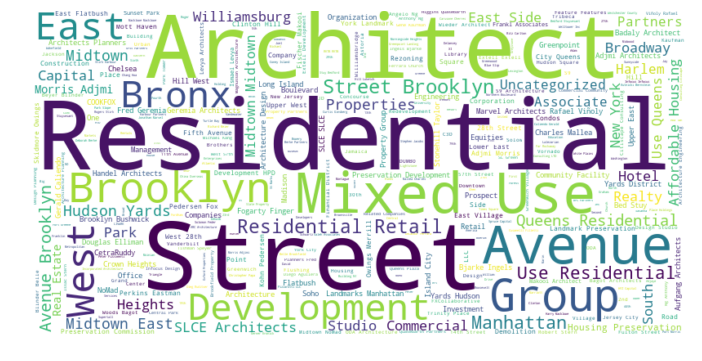

In [79]:
yimby = pd.read_csv('data/yimby.csv')
yimby.date_published = list(map(lambda x: datetime.strptime(x, "%B %d, %Y"),yimby.date_published))
yimby.tags = list(map(lambda x: x.split(','),yimby.tags))
yimby.sample(10)

stopwords = ['New York', 'Architecture','Architect','Avenue','Street','Construction Update']
yimby['tags'] = yimby['tags'].apply(lambda x: ' '.join([word for word in x if word not in stopwords]))

yimby_year = yimby[yimby.date_published > date(2019, 1, 1)]
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
# generate word cloud
wc.generate(' '.join(yimby_year['tags']))
# show
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [89]:
yimby = pd.read_csv('data/yimby.csv')
yimby.date_published = list(map(lambda x: datetime.strptime(x, "%B %d, %Y"),yimby.date_published))
yimby.tags = list(map(lambda x: x.split(','),yimby.tags))
yimby.sample(10)
yimby.date_published.min()

Timestamp('2011-09-28 00:00:00')

In [101]:
pd.DataFrame(data = {'Address':[1],'c' : [2]})

,Address,c
0,1,2


In [5]:
df_pluto = pd.read_csv('D:/GIS/Pluto/18.2.1/MapPLUTO_18v2_1.csv')

In [70]:
bbl = int("%01d" % (1)+"%05d" % (1302) + "%04d" % (25))
df_pluto.loc[df_pluto[df_pluto.BBL == bbl].index[0]].to_frame().reset_index().iloc[0,1]

# df = df_pluto[df_pluto.BBL == bbl].loc[0].to_frame()
# df['index'] = df
# df

'131 EAST 47 STREET'

In [918]:
'' POS tag list:

CC	coordinating conjunction
CD	cardinal digit
DT	determiner
EX	existential there (like: "there is" ... think of it like "there exists")
FW	foreign word
IN	preposition/subordinating conjunction
JJ	adjective	'big'
JJR	adjective, comparative	'bigger'
JJS	adjective, superlative	'biggest'
LS	list marker	1)
MD	modal	could, will
NN	noun, singular 'desk'
NNS	noun plural	'desks'
NNP	proper noun, singular	'Harrison'
NNPS	proper noun, plural	'Americans'
PDT	predeterminer	'all the kids'
POS	possessive ending	parent\'s
PRP	personal pronoun	I, he, she
PRP$	possessive pronoun	my, his, hers
RB	adverb	very, silently,
RBR	adverb, comparative	better
RBS	adverb, superlative	best
RP	particle	give up
TO	to	go 'to' the store.
UH	interjection	errrrrrrrm
VB	verb, base form	take
VBD	verb, past tense	took
VBG	verb, gerund/present participle	taking
VBN	verb, past participle	taken
VBP	verb, sing. present, non-3d	take
VBZ	verb, 3rd person sing. present	takes
WDT	wh-determiner	which
WP	wh-pronoun	who, what
WP$	possessive wh-pronoun	whose
WRB	wh-abverb	where, when ''

SyntaxError: invalid syntax (<ipython-input-918-3e905429286c>, line 1)

In [ ]:
import requests
import urllib.parse
address = '345 East 33rd'
address = urllib.parse.quote(address)
print (address)
url = "https://search-api.planninglabs.nyc/search?helpers[]=geosearch&helpers[]=bbl&helpers[]=neighborhood&helpers[]=zoning-district&helpers[]=zoning-map-amendment&helpers[]=special-purpose-district&helpers[]=commercial-overlay&q={}".format(address)
response  = requests.get(url)

response.json()[0]['label']